In [1]:
print("Bismillah!")

Bismillah!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Churn_Dataset.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info() # Surname , Geography, Gender are categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Transforming Age data into categorical data
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 70, 100], labels=['0-18', '18-35', '35-50', '50-70', '70-100'])

# *Simple Visualization*

## Visualization on Credit Score

<ipython-input-8-5b16d73025f3>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cat)['CreditScore'].agg(['mean', 'min', 'max']).reset_index()


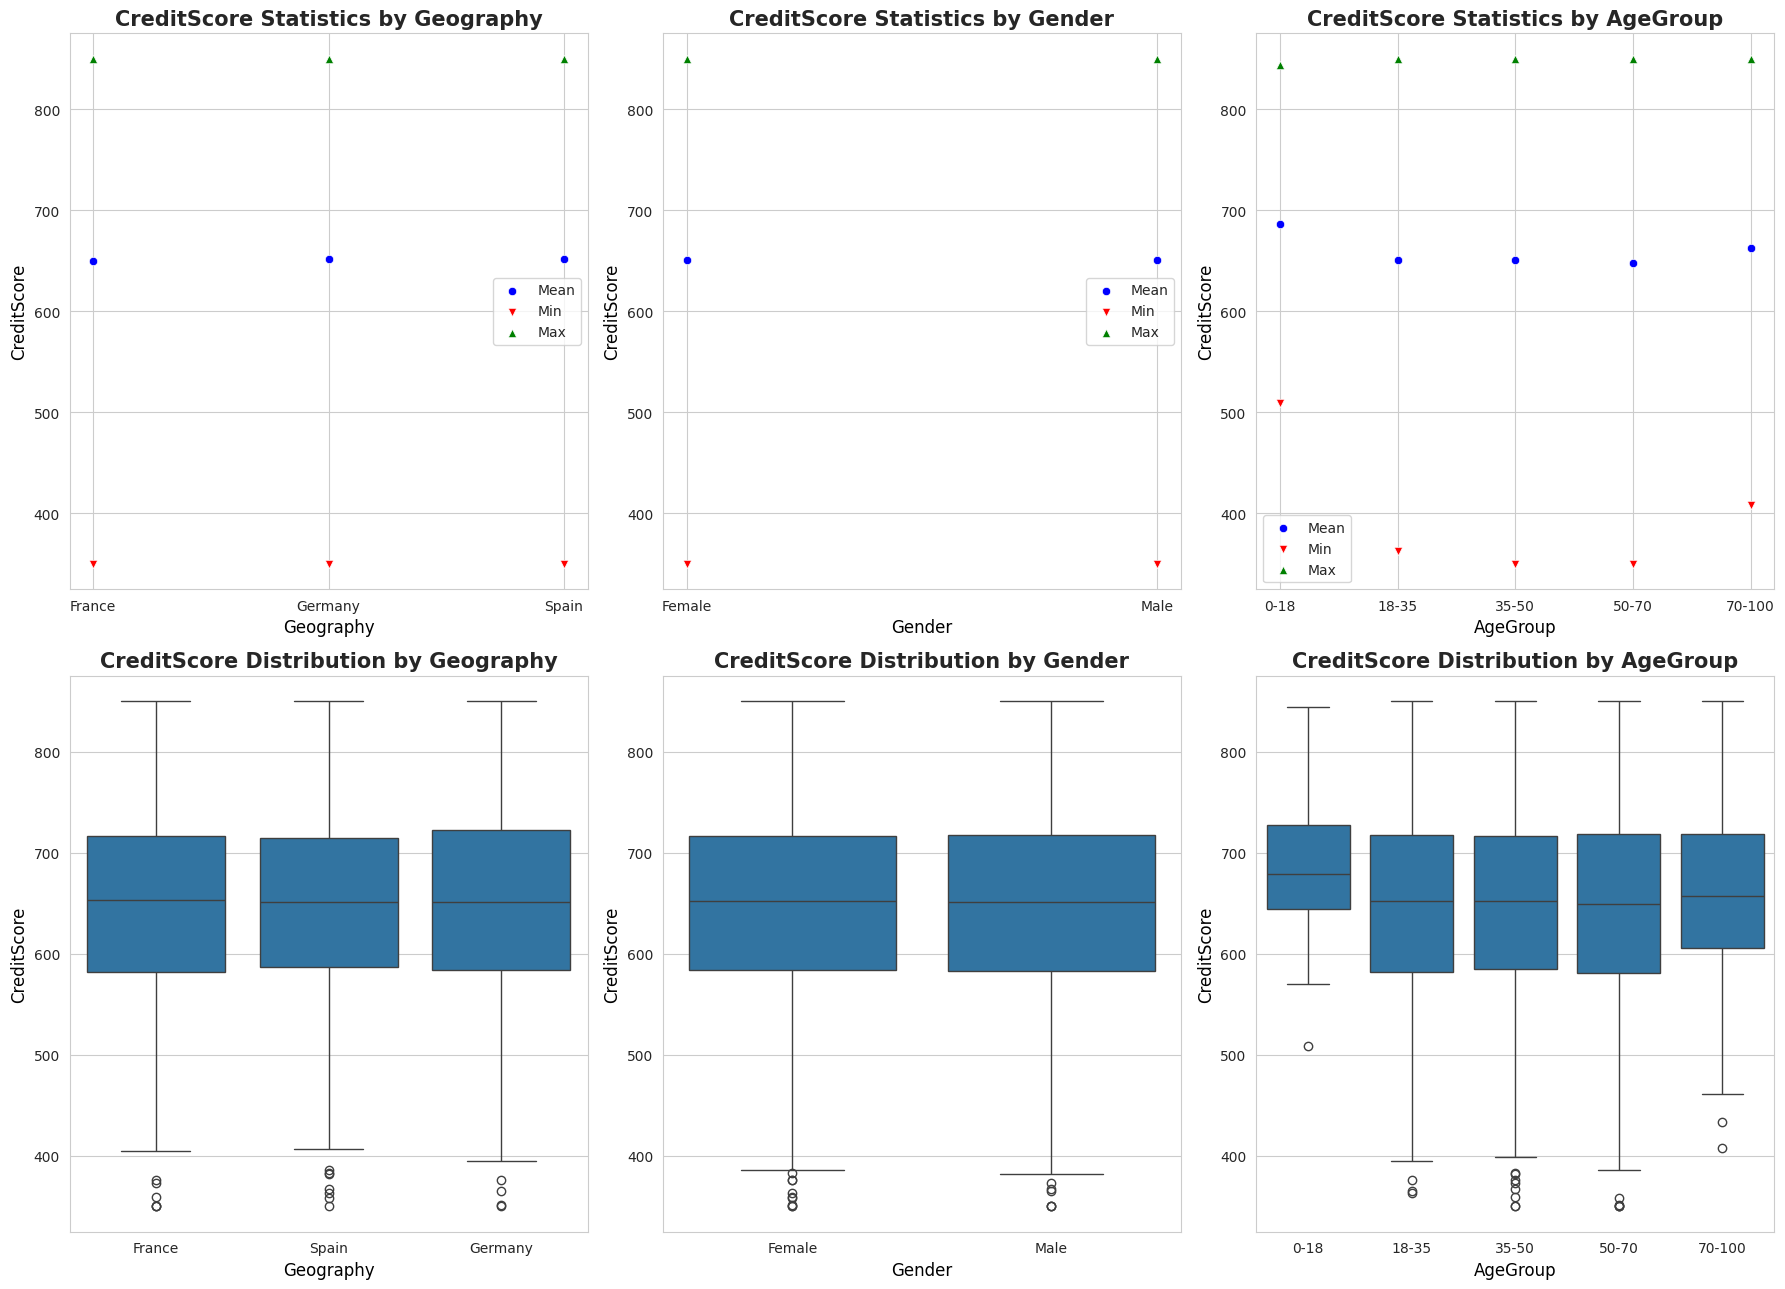

In [8]:
sns.set_style("whitegrid")

categories = ['Geography', 'Gender', 'AgeGroup']

fig, axes = plt.subplots(2, 3, figsize=(18, 13))

for i, cat in enumerate(categories):
    summary = df.groupby(cat)['CreditScore'].agg(['mean', 'min', 'max']).reset_index()
    # dot plots for mean, min, and max of CreditScore
    ax1 = axes[0,i]
    sns.scatterplot(data=summary, x=cat, y='mean', color='blue', label='Mean', ax=ax1)
    sns.scatterplot(data=summary, x=cat, y='min', marker='v', color='red', label='Min', ax=ax1)
    sns.scatterplot(data=summary, x=cat, y='max', marker='^', color='green', label='Max', ax=ax1)

    ax1.set_title(f'CreditScore Statistics by {cat}', fontsize=15, fontweight='bold')
    ax1.set_xlabel(cat, fontsize=12,color = 'black')
    ax1.set_ylabel('CreditScore', fontsize=12,color = 'black')
    ax1.legend()

    # boxplot for CreditScore distribution
    ax2 = axes[1,i]
    sns.boxplot(data=df, x=cat, y='CreditScore', ax=ax2)
    ax2.set_title(f'CreditScore Distribution by {cat}', fontsize=15, fontweight='bold')
    ax2.set_xlabel(cat, fontsize=12,color = 'black')
    ax2.set_ylabel('CreditScore', fontsize=12,color = 'black')

plt.tight_layout()
plt.show()


## Visualization on Balance

<ipython-input-9-d36cc9520ed7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cat)['Balance'].agg(['mean', 'min', 'max']).reset_index()


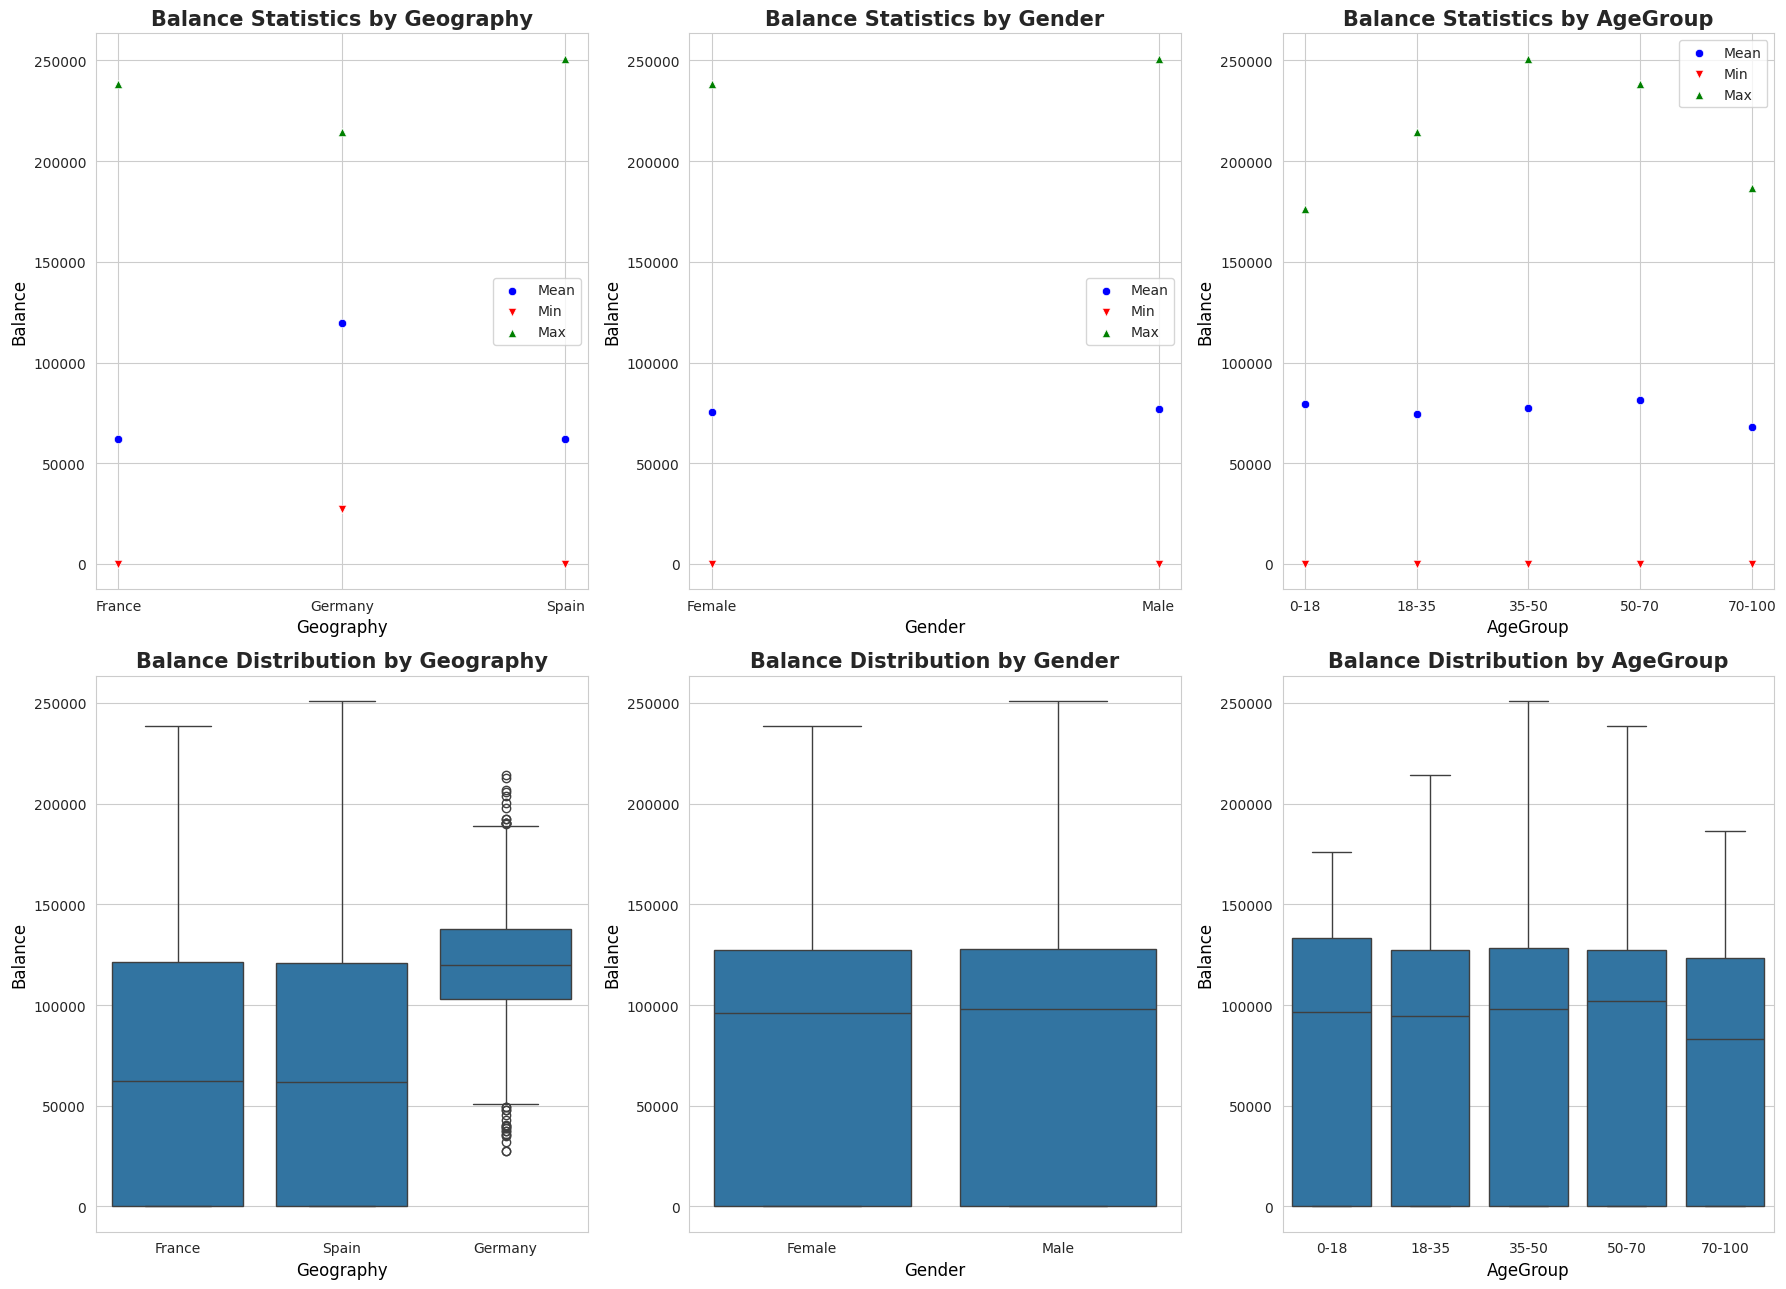

In [9]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 13))

for i, cat in enumerate(categories):
    summary = df.groupby(cat)['Balance'].agg(['mean', 'min', 'max']).reset_index()
    # dot plots for mean, min, and max of Balance
    ax1 = axes[0,i]
    sns.scatterplot(data=summary, x=cat, y='mean', color='blue', label='Mean', ax=ax1)
    sns.scatterplot(data=summary, x=cat, y='min', marker='v', color='red', label='Min', ax=ax1)
    sns.scatterplot(data=summary, x=cat, y='max', marker='^', color='green', label='Max', ax=ax1)

    ax1.set_title(f'Balance Statistics by {cat}', fontsize=15, fontweight='bold')
    ax1.set_xlabel(cat, fontsize=12, color='black')
    ax1.set_ylabel('Balance', fontsize=12, color='black')
    ax1.legend()

    # boxplot for Balance distribution
    ax2 = axes[1,i]
    sns.boxplot(data=df, x=cat, y='Balance', ax=ax2)
    ax2.set_title(f'Balance Distribution by {cat}', fontsize=15, fontweight='bold')
    ax2.set_xlabel(cat, fontsize=12, color='black')
    ax2.set_ylabel('Balance', fontsize=12, color='black')

plt.tight_layout()
plt.show()



<ipython-input-10-77998861c347>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zero_balance = df[df['Balance'] == 0].groupby(categories).size().reset_index(name='count')


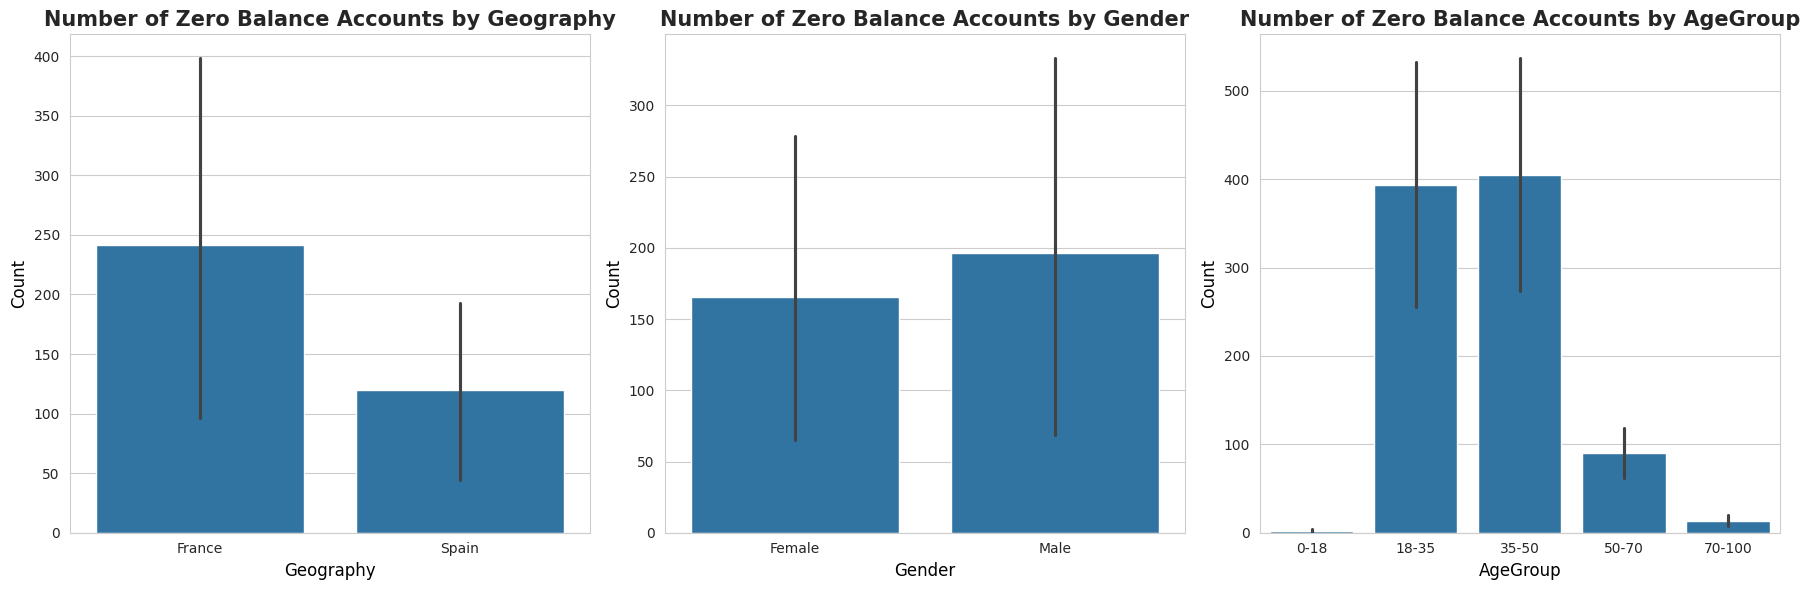

In [10]:
# number of zero balance accounts for each Category
zero_balance = df[df['Balance'] == 0].groupby(categories).size().reset_index(name='count')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, cat in enumerate(categories):
    sns.barplot(data=zero_balance, x=cat, y='count', ax=axes[i])
    axes[i].set_title(f'Number of Zero Balance Accounts by {cat}', fontsize=15, fontweight='bold')
    axes[i].set_xlabel(cat, fontsize=12, color='black')
    axes[i].set_ylabel('Count', fontsize=12, color='black')

plt.tight_layout()
plt.show()

## Visualization on EstimatedSalary

<ipython-input-11-c76506214213>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cat)['EstimatedSalary'].agg(['mean', 'min', 'max']).reset_index()


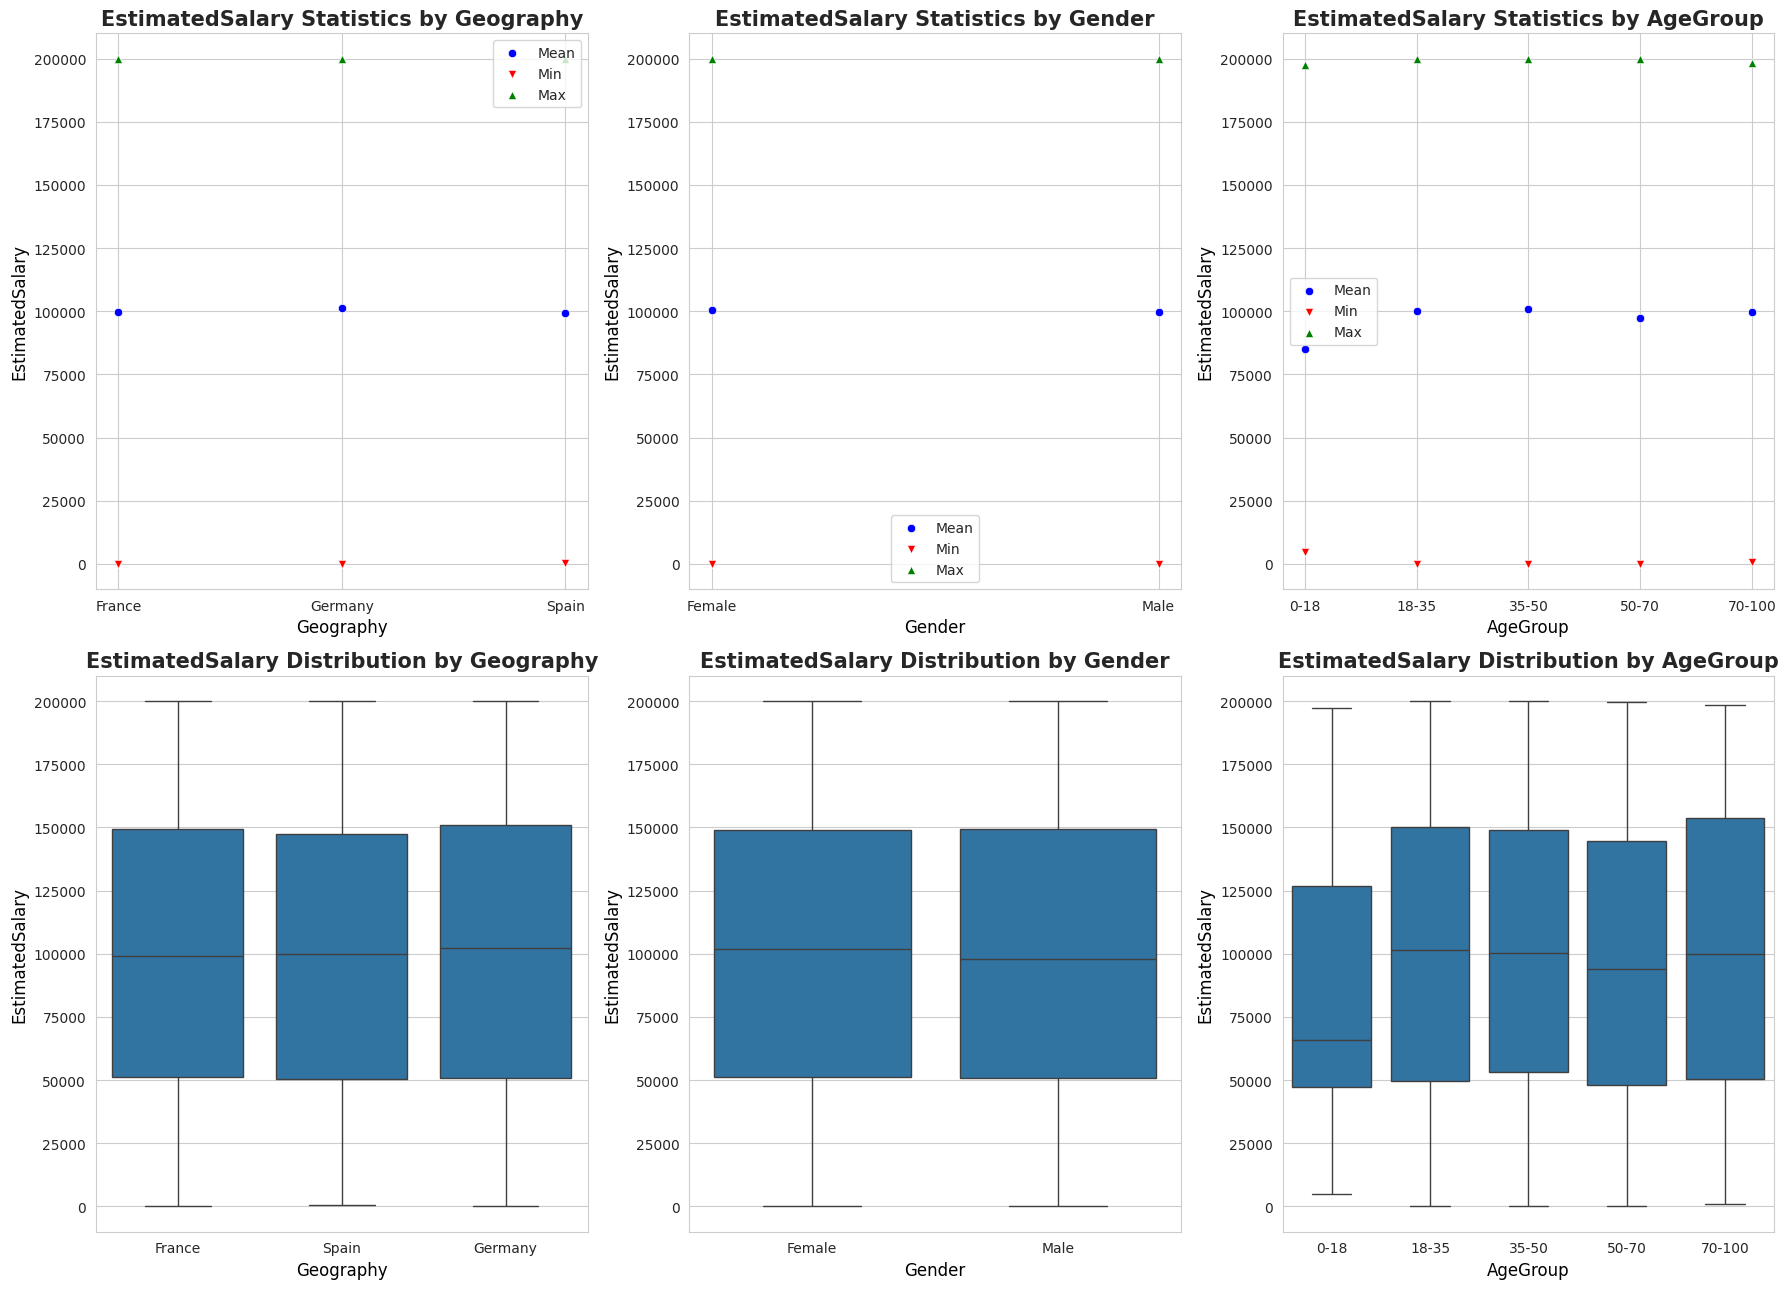

In [11]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 13))

for i, cat in enumerate(categories):
    summary = df.groupby(cat)['EstimatedSalary'].agg(['mean', 'min', 'max']).reset_index()
    # dot plots for mean, min, and max of EstimatedSalary
    ax1 = axes[0,i]
    sns.scatterplot(data=summary, x=cat, y='mean', color='blue', label='Mean', ax=ax1)
    sns.scatterplot(data=summary, x=cat, y='min', marker='v', color='red', label='Min', ax=ax1)
    sns.scatterplot(data=summary, x=cat, y='max', marker='^', color='green', label='Max', ax=ax1)

    ax1.set_title(f'EstimatedSalary Statistics by {cat}', fontsize=15, fontweight='bold')
    ax1.set_xlabel(cat, fontsize=12, color='black')
    ax1.set_ylabel('EstimatedSalary', fontsize=12, color='black')
    ax1.legend()

    # boxplot for EstimatedSalary distribution
    ax2 = axes[1,i]
    sns.boxplot(data=df, x=cat, y='EstimatedSalary', ax=ax2)
    ax2.set_title(f'EstimatedSalary Distribution by {cat}', fontsize=15, fontweight='bold')
    ax2.set_xlabel(cat, fontsize=12, color='black')
    ax2.set_ylabel('EstimatedSalary', fontsize=12, color='black')

plt.tight_layout()
plt.show()


## Visualization on HasCrCard
#### Customer has credit card or not. If yes then 1 else 0

<ipython-input-12-099670a818c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_summary, x='HasCrCard', y=cat, palette='Blues_d', ax=ax, orient='h')
<ipython-input-12-099670a818c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_summary, x='HasCrCard', y=cat, palette='Blues_d', ax=ax, orient='h')
<ipython-input-12-099670a818c7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cat)['HasCrCard'].sum().reset_index()
<ipython-input-12-099670a818c7>:9: FutureWarning

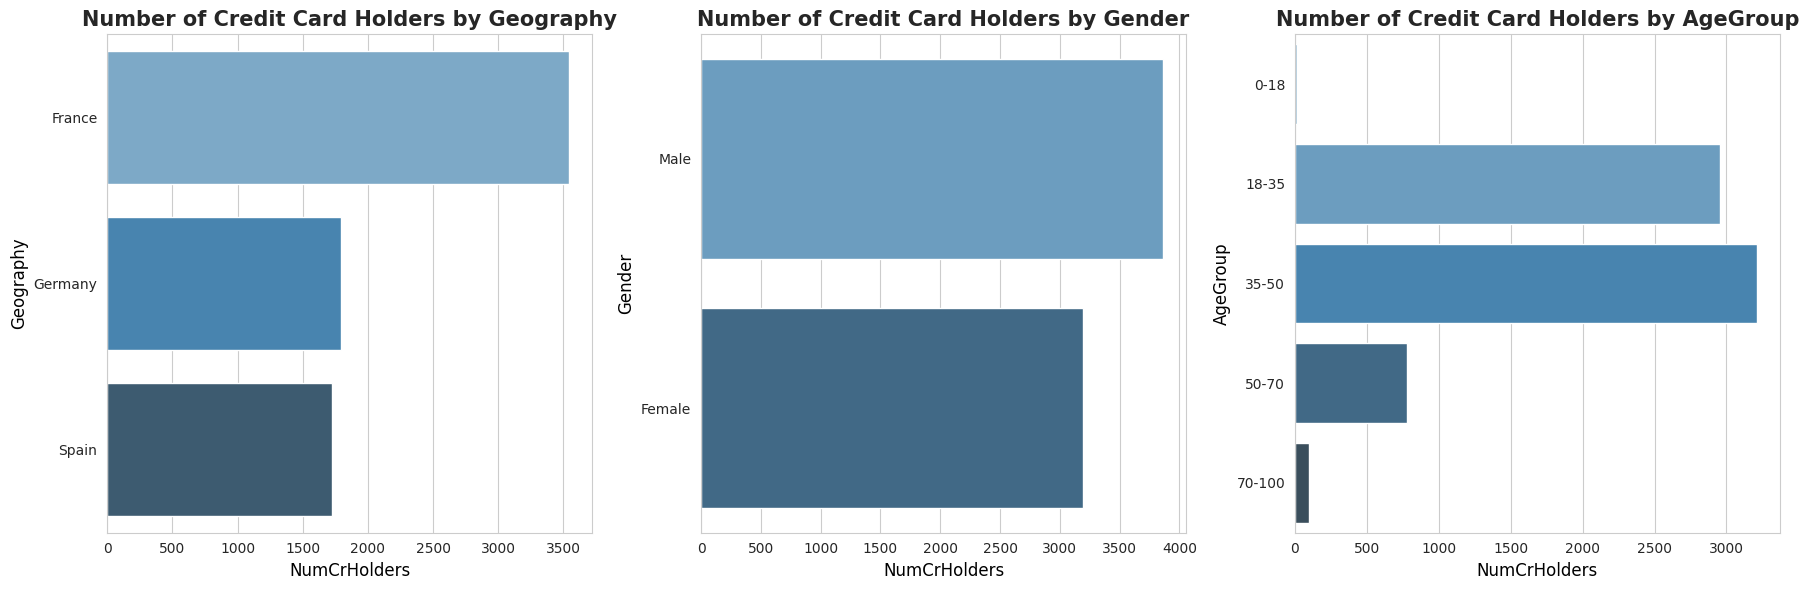

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# bar plot on total number of credit card holders
for i, cat in enumerate(categories):
    summary = df.groupby(cat)['HasCrCard'].sum().reset_index()
    top_summary = summary.sort_values(by='HasCrCard', ascending=False)

    ax = axes[i]
    sns.barplot(data=top_summary, x='HasCrCard', y=cat, palette='Blues_d', ax=ax, orient='h')

    ax.set_title(f'Number of Credit Card Holders by {cat}', fontsize=15, fontweight='bold')
    ax.set_xlabel('NumCrHolders', fontsize=12, color='black')
    ax.set_ylabel(cat, fontsize=12, color='black')

plt.tight_layout()
plt.show()


## Visualization on isActiveMember
#### Customer is Active member or not. If yes then 1 else 0

<ipython-input-13-836b24a97b16>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_summary, x='IsActiveMember', y=cat, palette='Greens_d', ax=ax, orient='h')
<ipython-input-13-836b24a97b16>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_summary, x='IsActiveMember', y=cat, palette='Greens_d', ax=ax, orient='h')
<ipython-input-13-836b24a97b16>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cat)['IsActiveMember'].sum().reset_index()
<ipython-input-13-836b24a97b16>

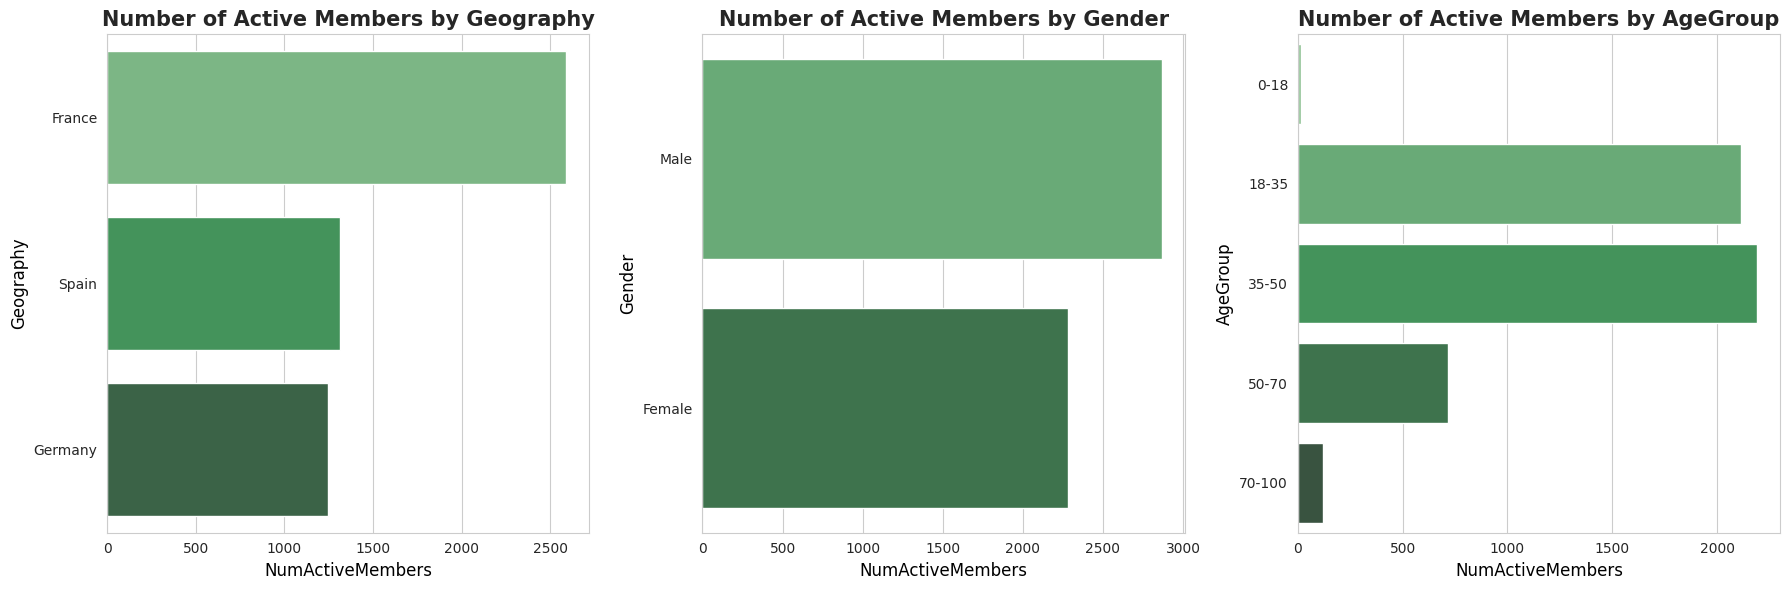

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# bar plot on total number of credit card holders
for i, cat in enumerate(categories):
    summary = df.groupby(cat)['IsActiveMember'].sum().reset_index()
    top_summary = summary.sort_values(by='IsActiveMember', ascending=False)

    ax = axes[i]
    sns.barplot(data=top_summary, x='IsActiveMember', y=cat, palette='Greens_d', ax=ax, orient='h')

    ax.set_title(f'Number of Active Members by {cat}', fontsize=15, fontweight='bold')
    ax.set_xlabel('NumActiveMembers', fontsize=12, color='black')
    ax.set_ylabel(cat, fontsize=12, color='black')

plt.tight_layout()
plt.show()


## Visualization on Exited
#### Customer is Exited the Company or not. If yes then 1 else 0

<ipython-input-14-d7d4a62b6f48>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_summary, x='Exited', y=cat, palette='Reds_d', ax=ax, orient='h')
<ipython-input-14-d7d4a62b6f48>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_summary, x='Exited', y=cat, palette='Reds_d', ax=ax, orient='h')
<ipython-input-14-d7d4a62b6f48>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(cat)['Exited'].sum().reset_index()
<ipython-input-14-d7d4a62b6f48>:9: FutureWarning: 

Passing

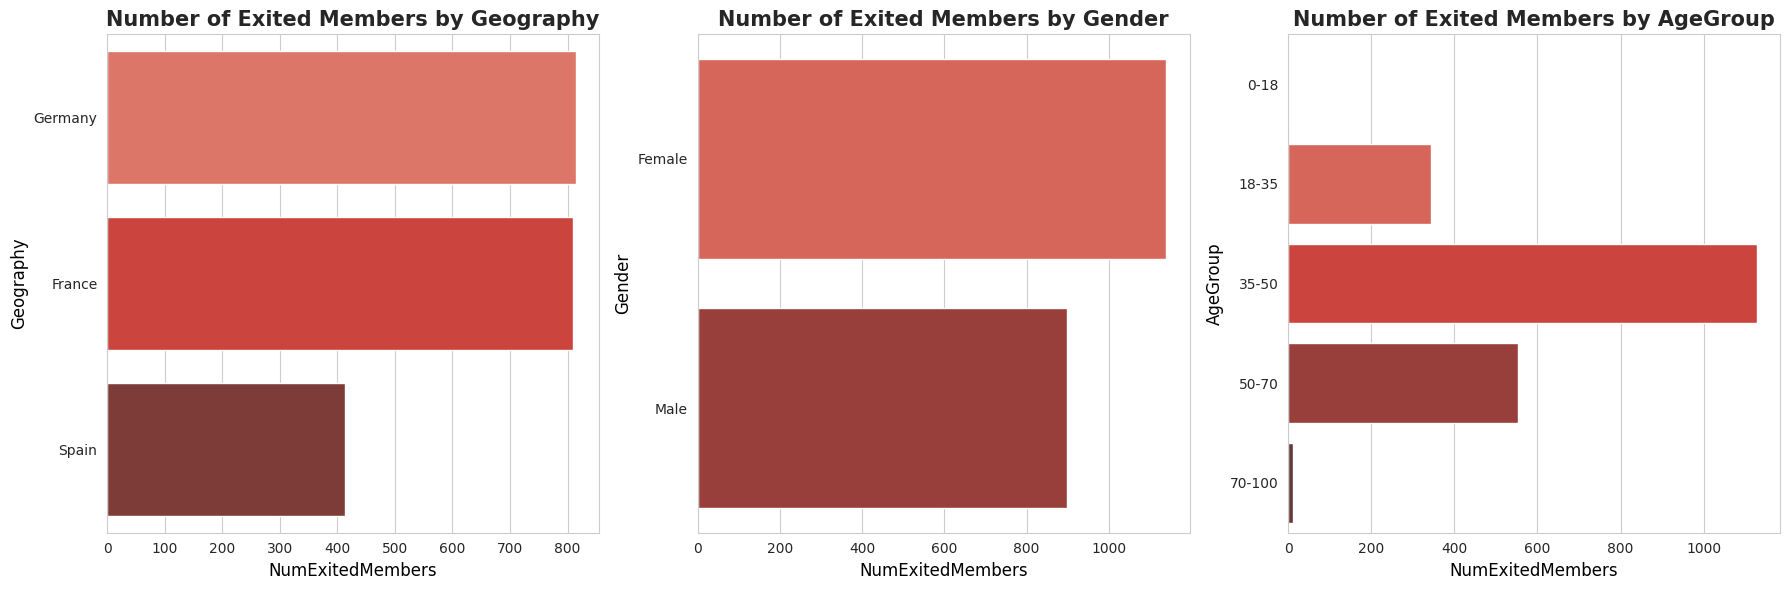

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# bar plot on total number of credit card holders
for i, cat in enumerate(categories):
    summary = df.groupby(cat)['Exited'].sum().reset_index()
    top_summary = summary.sort_values(by='Exited', ascending=False)

    ax = axes[i]
    sns.barplot(data=top_summary, x='Exited', y=cat, palette='Reds_d', ax=ax, orient='h')

    ax.set_title(f'Number of Exited Members by {cat}', fontsize=15, fontweight='bold')
    ax.set_xlabel('NumExitedMembers', fontsize=12, color='black')
    ax.set_ylabel(cat, fontsize=12, color='black')

plt.tight_layout()
plt.show()


# *Classification*
## If customer will leave or not

## Transforming the Dataset

In [15]:
#Removing unnecessary columns

df.drop(['RowNumber', 'CustomerId', 'Surname', 'AgeGroup'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# dividing the dataset into dependent and independent variables
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
# Dropping categorical columns
numerical = X.drop(['Geography', 'Gender'], axis=1)

# Handling the Categorical data
categorical = X.filter(['Geography', 'Gender'])

# One Hot Encoding
cat_numerical = pd.get_dummies(categorical).astype(int)

# Concatenating the numerical and categorical data
X = pd.concat([numerical, cat_numerical], axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [18]:
# Train ans Test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Heatmap

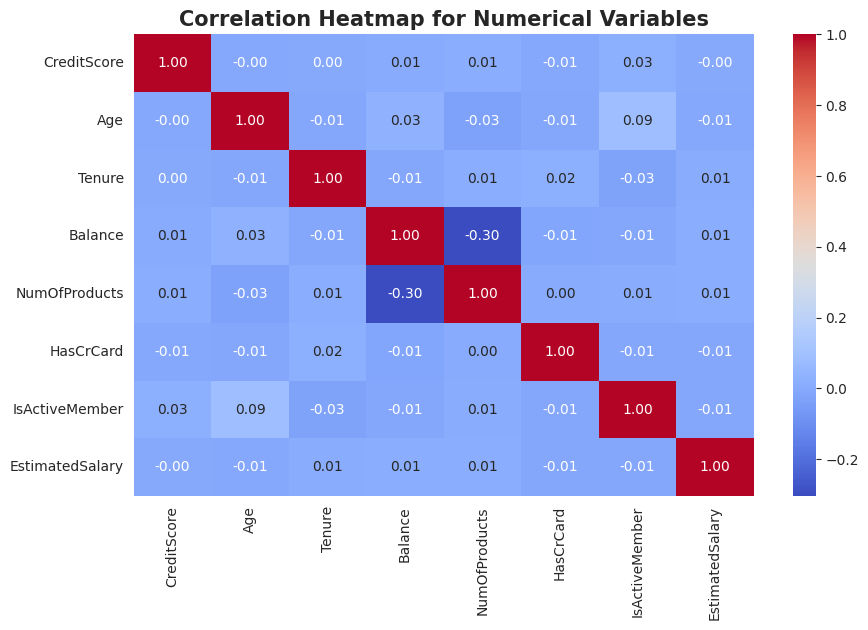

In [20]:
# plotting heat map for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Variables', fontsize=15, fontweight='bold')
plt.show()

## Logistic Regression

In [21]:
Accuracy = {}
Precision = {}
Recall = {}

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
logClass = lr.fit(X_train,y_train)

y_pred = logClass.predict(X_test)  # Predicting the test set results

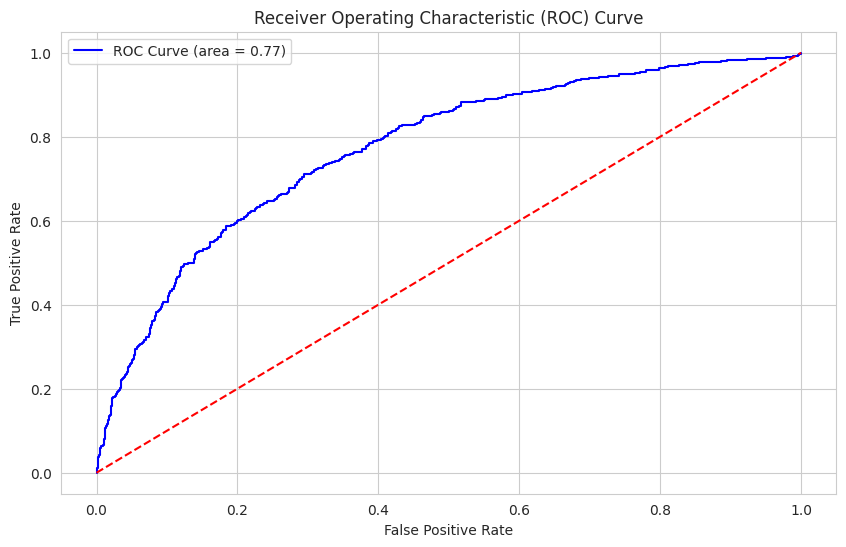

In [23]:
# ROC Curve and plotting
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = logClass.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)  # fpr = false positive rate, tpr = true positive rate

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [24]:
# Making the Confusion Matrix,Accuracy Score and Classification Report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy Score : ",accuracy_score(y_test,y_pred))
print("\nClassifiction Report : \n",classification_report(y_test,y_pred))

#Storing the values for the model
Accuracy['LogisticRegression'] = accuracy_score(y_test,y_pred)
Recall['LogisticRegression'] = classification_report(y_test,y_pred,output_dict=True)['1']['recall']
Precision['LogisticRegression'] = classification_report(y_test,y_pred,output_dict=True)['1']['precision']


Confusion Matrix : 
 [[1526   69]
 [ 309   96]]

Accuracy Score :  0.811

Classifiction Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 32, n_estimators=400) # n_estimators is the number of trees in the forest.
# random_state is the seed used by the random number generator
rfClass = rf.fit(X_train,y_train)
y_pred = rfClass.predict(X_test)

In [26]:
# Making the Confusion Matrix,Accuracy Score and Classification Report
#from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy Score : ",accuracy_score(y_test,y_pred))
print("\nClassifiction Report : \n",classification_report(y_test,y_pred))

#Storing the values for the model
Accuracy['RandomForest'] = accuracy_score(y_test,y_pred)
Recall['RandomForest'] = classification_report(y_test,y_pred,output_dict=True)['1']['recall']
Precision['RandomForest'] = classification_report(y_test,y_pred,output_dict=True)['1']['precision']

Confusion Matrix : 
 [[1525   70]
 [ 191  214]]

Accuracy Score :  0.8695

Classifiction Report : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.53      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



## Clustering
#### K-Means

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=32) # n_clusters is the number of clusters to form
# as we already know the number of clusters, we have given n_clusters=2
# number of clusters can be found using Elbow Method or Dendrogram
km.fit(X_train) # As K-means is Unsupervised there is no need to split the data into train and test sets


KMeans(n_clusters=2, random_state=32)

In [28]:
# Predicting the clusters for the X_test set
y_kmeans = km.predict(X_train)

print("Confusion Matrix : \n",confusion_matrix(y_train,y_kmeans))
print("\nAccuracy Score : ",accuracy_score(y_train,y_kmeans))
print("\nClassification Report : \n",classification_report(y_train,y_kmeans))


Confusion Matrix : 
 [[3633 2735]
 [ 717  915]]

Accuracy Score :  0.5685

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.57      0.68      6368
           1       0.25      0.56      0.35      1632

    accuracy                           0.57      8000
   macro avg       0.54      0.57      0.51      8000
weighted avg       0.72      0.57      0.61      8000



In [45]:
# Predicting the clusters for the test set
y_kmeans = km.predict(X_test)

print("Confusion Matrix : \n",confusion_matrix(y_test,y_kmeans))
print("\nTraining Accuracy Score : ",accuracy_score(y_test,y_kmeans))
print("\nClassifiction Report : \n",classification_report(y_test,y_kmeans))

Accuracy['K-Means Clustering'] = accuracy_score(y_test,y_kmeans)
Recall['K-Means Clustering'] = classification_report(y_test,y_kmeans,output_dict=True)['1']['recall']
Precision['K-Means Clustering'] = classification_report(y_test,y_kmeans,output_dict=True)['1']['precision']

Confusion Matrix : 
 [[926 669]
 [181 224]]

Training Accuracy Score :  0.575

Classifiction Report : 
               precision    recall  f1-score   support

           0       0.84      0.58      0.69      1595
           1       0.25      0.55      0.35       405

    accuracy                           0.57      2000
   macro avg       0.54      0.57      0.52      2000
weighted avg       0.72      0.57      0.62      2000



### Elbow Method

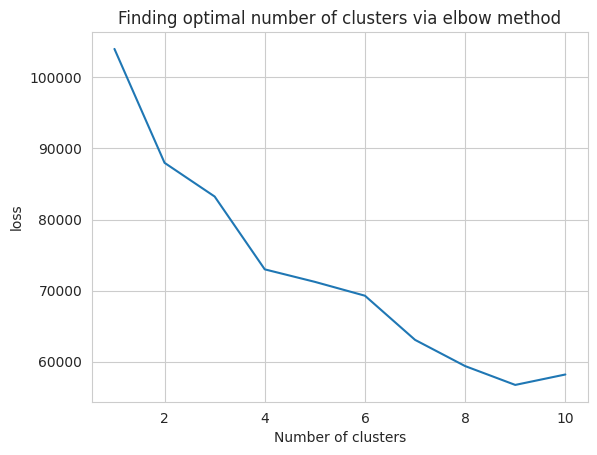

KMeans(n_clusters=2, random_state=32)

In [30]:
# how to use elbow method to find the optimal number of clusters
loss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i).fit(X_train)
    loss.append(km.inertia_)

plt.plot(range(1,11),loss)
plt.title('Finding optimal number of clusters via elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('loss')
plt.show()

# we can see that the optimal number of clusters is 4
# but as we alreaddy know that exited value is binary there is no need to go for 4 clusters
# we can go for 2 clusters
km = KMeans(n_clusters=2, random_state=32)
km.fit(X_train)


# *ANN*

## Classification by using ANN

In [31]:
#!pip install tensorflow

In [32]:
# Uninstalling tensorflow
#!pip uninstall tensorflow -y

In [33]:
# Upgrading necessary libraries
#%pip install --upgrade numpy tensorflow keras

# Importing necessary libraries
import tensorflow as tf # We are using TensorFlow as the backend of Keras
from keras.models import Sequential
from keras.layers import Dense
tf.__version__

'2.18.0'

In [36]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the First hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #ReLU as activation function

#Adding Second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #ReLU as activation function

#adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #using sigmoid as a activation function

In [37]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#optimizer as Adam,
#lossFunction as binary Crossentropy,
#metrics as accuracy, Precision, Recall, F-1 Score


In [38]:
#Training the ANN on the training Set
ann.fit(X_train, y_train, batch_size = 40, epochs = 50)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7965 - loss: 0.5856
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.4820
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4474
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7898 - loss: 0.4504
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8091 - loss: 0.4299
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8188 - loss: 0.4273
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.4174
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8267 - loss: 0.4129
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8255 - loss: 0.4173
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8245 - loss: 0.4077
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8301 - loss: 0.4016
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [40]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [41]:
#Single data prediction
print(ann.predict(sc.transform([[600, 35, 3, 65000, 1, 1, 1, 70000, 0, 1, 0, 0, 1]])) > 0.5)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[False]]


In [43]:
#Predicting Test set Results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)) # Converting y_test to NumPy array using .values

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [44]:
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nTraining Accuracy Score : ",accuracy_score(y_test,y_pred))
print("\nClassifiction Report : \n",classification_report(y_test,y_pred))

Accuracy['ANN'] = accuracy_score(y_test,y_pred)
Recall['ANN'] = classification_report(y_test,y_pred,output_dict=True)['1']['recall']
Precision['ANN'] = classification_report(y_test,y_pred,output_dict=True)['1']['precision']

Confusion Matrix : 
 [[1519   76]
 [ 202  203]]

Training Accuracy Score :  0.861

Classifiction Report : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



# *Summary*

## Accuracy,Recall & Precision Score for each above model

In [47]:
# prompt: print("Accuracy Score : \n",Accuracy)
# print("\nRecall Score : \n",Recall)
# print("\nPrecision Score : \n",Precision)
data = {'Metric': ['Accuracy', 'Recall', 'Precision'],
        'LogisticRegression': [Accuracy['LogisticRegression'], Recall['LogisticRegression'], Precision['LogisticRegression']],
        'RandomForest': [Accuracy['RandomForest'], Recall['RandomForest'], Precision['RandomForest']],
        'K-Means Clustering': [Accuracy['K-Means Clustering'], Recall['K-Means Clustering'], Precision['K-Means Clustering']],
        'ANN': [Accuracy['ANN'], Recall['ANN'], Precision['ANN']]}
df_scores = pd.DataFrame(data)
df_scores


,Metric,LogisticRegression,RandomForest,K-Means Clustering,ANN
0,Accuracy,0.811000,0.869500,0.575000,0.861000
1,Recall,0.237037,0.528395,0.553086,0.501235
2,Precision,0.581818,0.753521,0.250840,0.727599
